## Exploratory Data Analysis (EDA)

### 1. Import Required Libraries
Load all essential packages for data handling and visualization.


In [16]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from config import DATASET_PATH

### 2. Configure Plot Styles
Apply consistent and clean visual themes for all charts.

In [17]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

### 3. Load Dataset
Import the dataset into a pandas DataFrame and preview the first rows.


In [18]:
data = pd.read_csv(DATASET_PATH)
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


### 4. Dataset Shape
Display the total number of rows and columns in the dataset.

In [19]:
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (2154048, 19)


### 5. Dataset Columns
List all column names and count how many features are available.

In [20]:
print(f"Dataset Columns: {data.columns.to_list()}")
print(f"Dataset Columns Count: {len(data.columns)}")

Dataset Columns: ['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']
Dataset Columns Count: 19


### 6. Feature Types
Separate numerical and non-numerical (categorical) columns for later analysis.

In [21]:
non_num_cols = data.select_dtypes(exclude=["number"]).columns
num_cols = data.select_dtypes(include=["number"]).columns
print(f"Found {len(non_num_cols)} non-numerical columns: {non_num_cols.tolist()}")
print(f"Found {len(num_cols)} numerical columns: {num_cols.tolist()}")

Found 5 non-numerical columns: ['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']
Found 14 numerical columns: ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN']


### 7. Churn Distribution
Examine the proportion of churn vs. non-churn customers and visualize the class balance.



CHURN Distribution in Training Set
CHURN
0    81.25
1    18.75
Name: proportion, dtype: float64
Churn rate: 18.75%


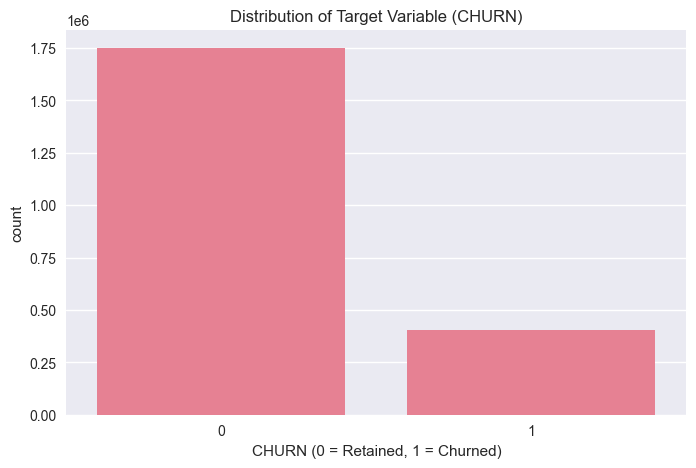

In [22]:
print("\nCHURN Distribution in Training Set")
print(data["CHURN"].value_counts(normalize=True).round(4) * 100)
print(f"Churn rate: {data['CHURN'].mean():.2%}")

plt.figure(figsize=(8,5))
sns.countplot(data=data, x="CHURN")
plt.title("Distribution of Target Variable (CHURN)")
plt.xlabel("CHURN (0 = Retained, 1 = Churned)")
plt.show()

### 8. Missing Values
Calculate the percentage of missing values per feature and visualize them.



Missing Values Percentage (>0%)
ZONE2             93.65
ZONE1             92.12
TIGO              59.89
DATA_VOLUME       49.23
FREQ_TOP_PACK     41.90
TOP_PACK          41.90
ORANGE            41.56
REGION            39.43
ON_NET            36.52
MONTANT           35.13
FREQUENCE_RECH    35.13
FREQUENCE         33.71
REVENUE           33.71
ARPU_SEGMENT      33.71
dtype: float64


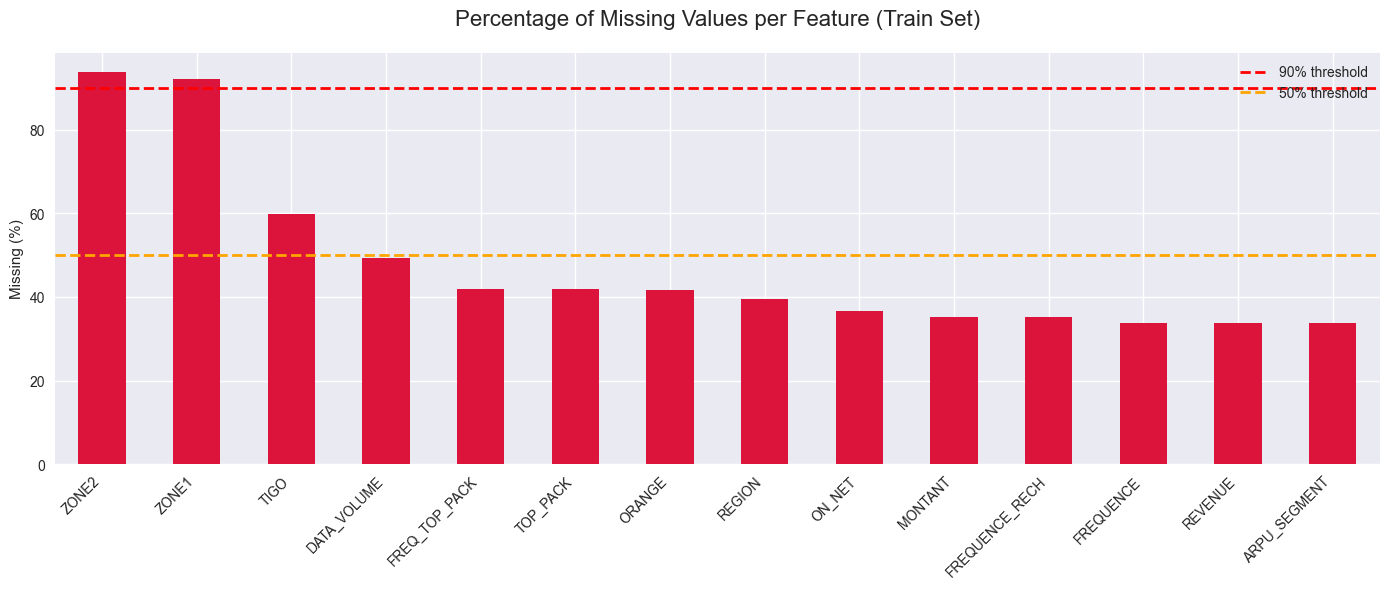

In [23]:
missing = (data.isnull().sum() / len(data) * 100).round(2)
missing = missing[missing > 0].sort_values(ascending=False)

print("\nMissing Values Percentage (>0%)")
print(missing)

plt.figure(figsize=(14,6))
missing.sort_values(ascending=False).plot.bar(color="crimson")
plt.title("Percentage of Missing Values per Feature (Train Set)", fontsize=16, pad=20)
plt.ylabel("Missing (%)")
plt.axhline(y=90, color="red",   linestyle="--", linewidth=2, label="90% threshold")
plt.axhline(y=50, color="orange", linestyle="--", linewidth=2, label="50% threshold")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 9. Correlation Matrix
Show correlations between numerical features to detect potential relationships.


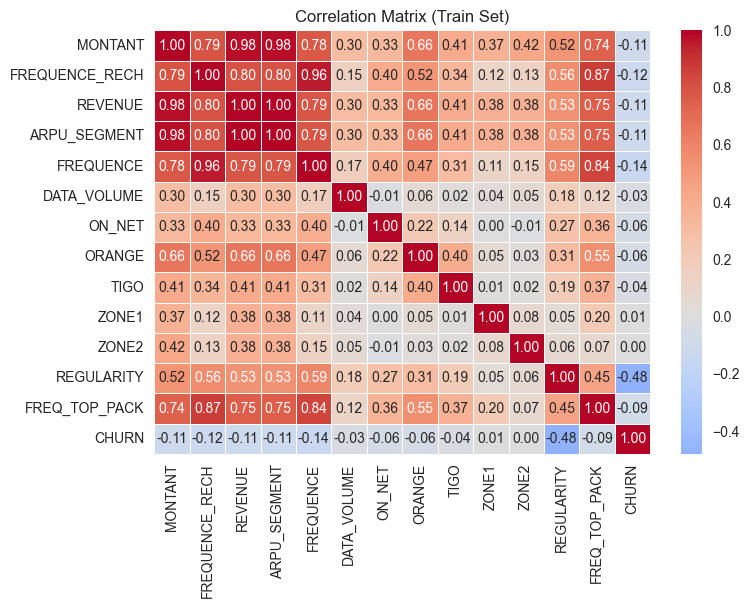

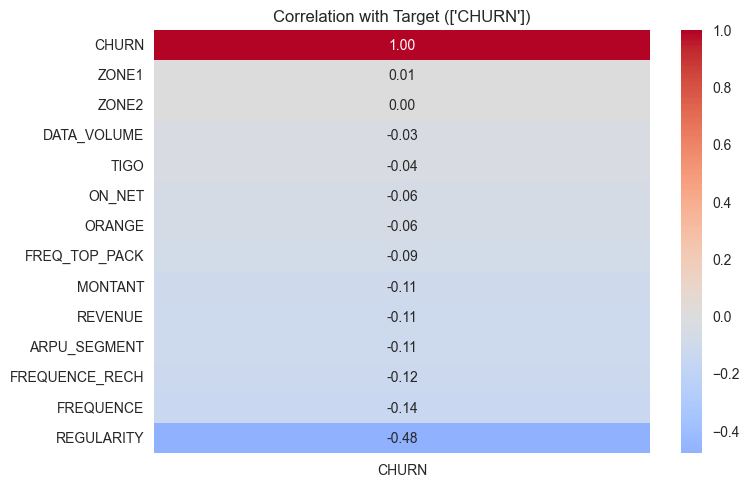

In [24]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
corr = data[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix (Train Set)", fontsize=12)
plt.show()

target_col = ["CHURN"]
corr_target = corr[target_col].sort_values(by=target_col, ascending=False)

sns.heatmap(corr_target, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title(f"Correlation with Target ({target_col})", fontsize=12)
plt.show()

### 10. Missing Values Heatmap
Visualize the pattern of missing data across the dataset.


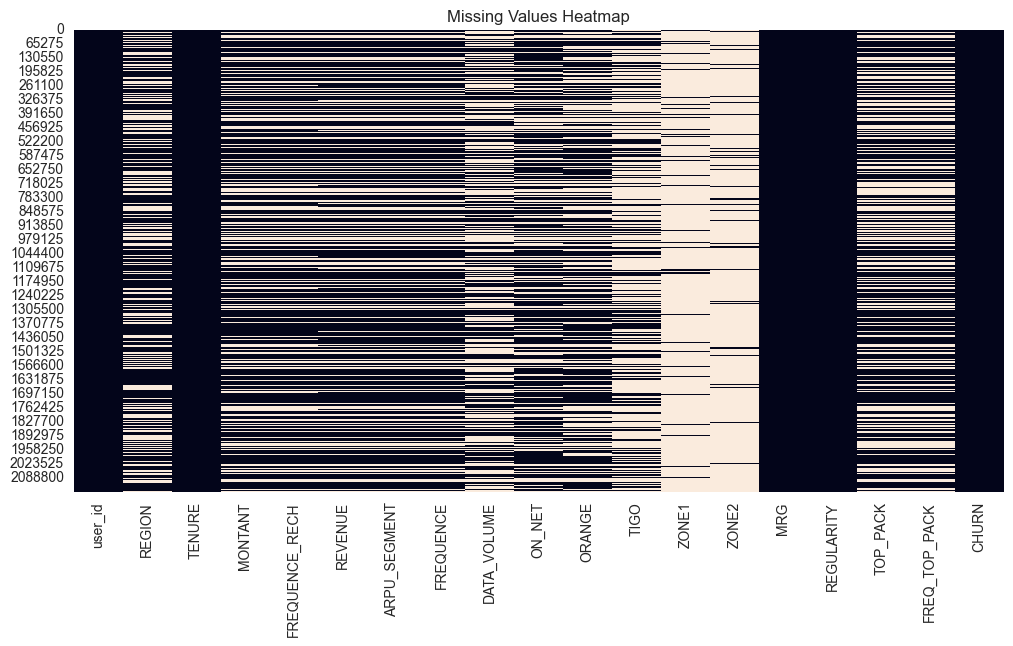

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### 11. Numerical Distributions
Plot histograms for all numerical variables to observe their distributions.


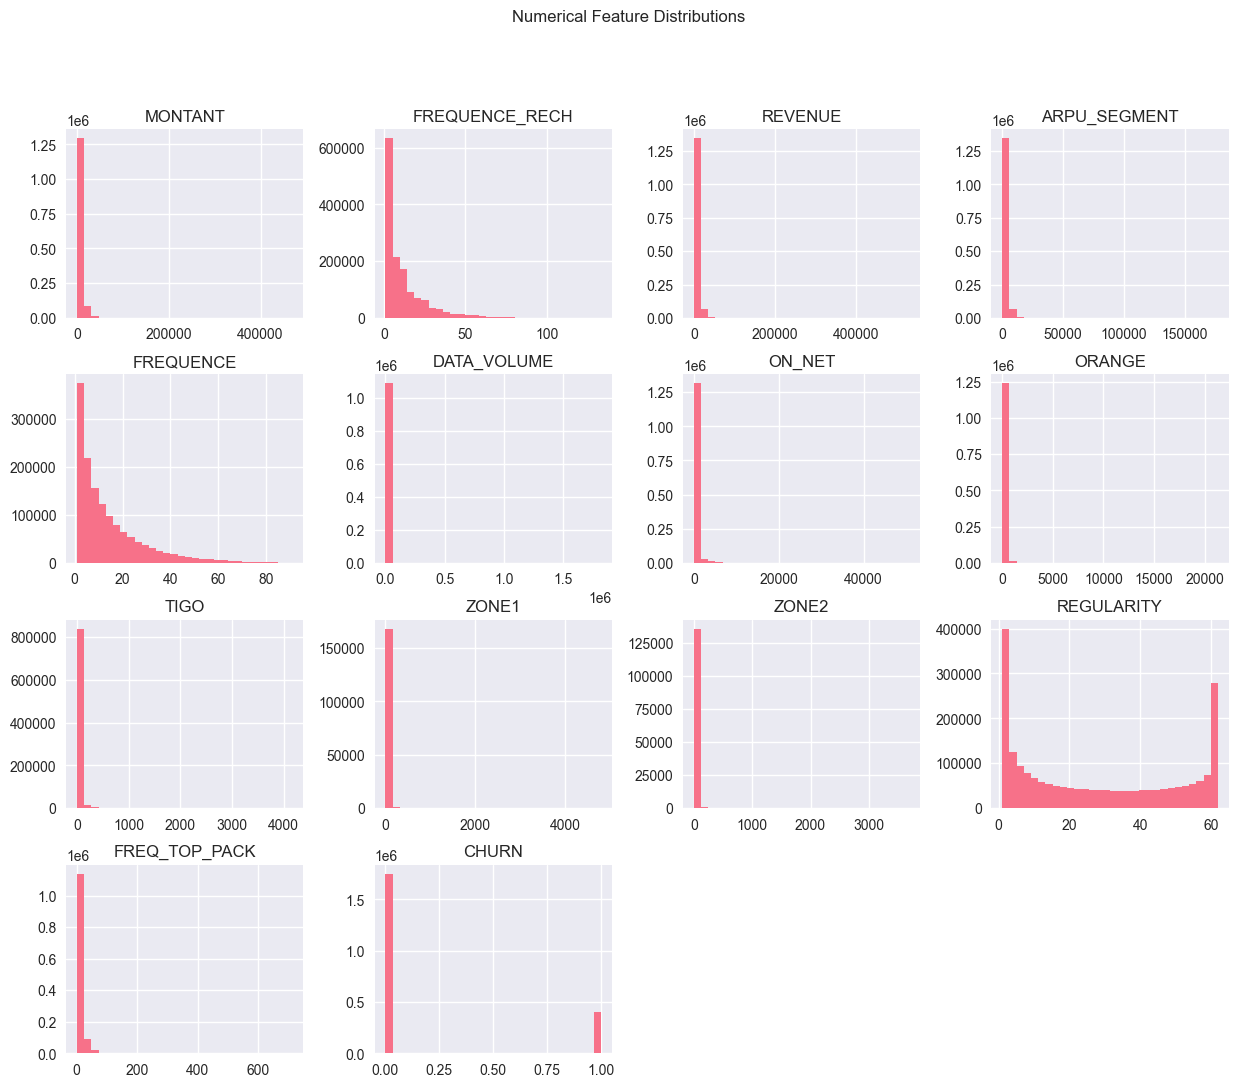

In [26]:
numeric_cols = data.select_dtypes(include=["number"]).columns

data[numeric_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

### Summary

This exploratory data analysis provided a comprehensive initial understanding of the telecom churn dataset used in the referenced study. The dataset contains a mix of numerical and categorical features describing customer activity, top-up behavior, usage patterns, network interactions, and churn status. The analysis performed in this notebook focused strictly on descriptive analytics without any transformations, ensuring an unbiased inspection of the raw data.

The dataset structure reveals a high number of samples along with several features containing significant amounts of missing information. Visual inspection through bar plots and heatmaps indicates that some variables have more than 50% or even 90% missing values, highlighting the need for careful preprocessing in future steps. Understanding the extent and distribution of missing data is crucial, as it impacts both model performance and the reliability of downstream interpretations.

The churn target variable appears imbalanced, with churn cases making up a smaller proportion of the dataset. This imbalance is consistent with many real-world telecom datasets and must be addressed during modeling to avoid biased predictions toward the majority class.

The distribution of numerical features demonstrates substantial skewness in several variables, with long tails and extreme values typical of customer usage and transactional datasets. These characteristics emphasize the importance of understanding the underlying distributions before selecting appropriate preprocessing or modeling techniques. Histograms across features such as revenue, data volume, and call counts highlight these patterns and provide insight into customer behavior diversity.

The correlation matrix reveals weak to moderate linear relationships between numerical variables, suggesting that most features contribute independent information rather than being strongly collinear. This is beneficial for tree-based models that do not require strict linear assumptions. However, it also confirms that churn is not directly explained by simple linear relationships alone, reinforcing the need for more advanced modeling techniques.

Altogether, the EDA establishes a solid foundation for subsequent steps such as data cleaning, imputation, encoding, scaling, and feature selection. It highlights important dataset properties, potential challenges, and areas requiring special attention. These observations will guide the construction of a robust modeling pipeline and support the development of interpretable, high-performing churn prediction models.